In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/demo-knes381/subject_1321.xlsx
/kaggle/input/demo-knes381/subject_1432.xlsx
/kaggle/input/demo-knes381/subject_1321.csv
/kaggle/input/demo-knes381/subject_1232.csv
/kaggle/input/demo-knes381/VO2_CSV.csv
/kaggle/input/demo-knes381/subject_1232.xlsx
/kaggle/input/demo-knes381/subject_1432.csv
/kaggle/input/demo-knes381/subject_1523.csv
/kaggle/input/demo-knes381/VO2_excel.xlsx
/kaggle/input/demo-knes381/subject_1523.xlsx


In [2]:
df = pd.read_csv('../input/demo-knes381/subject_1432.csv', header=[0], skiprows=[1,2,3])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TIME    60 non-null     float64
 1   VO2     60 non-null     float64
 2   VO2/kg  60 non-null     float64
 3   METS    60 non-null     float64
 4   VCO2    60 non-null     float64
 5   VE      60 non-null     float64
 6   RER     60 non-null     float64
 7   RR      60 non-null     float64
 8   Vt      60 non-null     float64
 9   FEO2    60 non-null     float64
 10  FECO2   60 non-null     float64
 11  HR      60 non-null     float64
 12  VE/     60 non-null     float64
 13  VE/.1   60 non-null     float64
 14  PetCO2  60 non-null     float64
dtypes: float64(15)
memory usage: 7.2 KB


### Rename some of the columns so they make sense
you can rename them with the value TIME -> Time(min) but don't leave spaces if you want to auto-complete names...

In [4]:
df = df.rename(columns={'VE/': 'VE/VO2','VE/.1': 'VE/VCO2'})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TIME     60 non-null     float64
 1   VO2      60 non-null     float64
 2   VO2/kg   60 non-null     float64
 3   METS     60 non-null     float64
 4   VCO2     60 non-null     float64
 5   VE       60 non-null     float64
 6   RER      60 non-null     float64
 7   RR       60 non-null     float64
 8   Vt       60 non-null     float64
 9   FEO2     60 non-null     float64
 10  FECO2    60 non-null     float64
 11  HR       60 non-null     float64
 12  VE/VO2   60 non-null     float64
 13  VE/VCO2  60 non-null     float64
 14  PetCO2   60 non-null     float64
dtypes: float64(15)
memory usage: 7.2 KB


In [6]:
import matplotlib.pyplot as plt

### Create our big plot...
1st define our variables x,y,& y1

In [7]:
print(df.columns)

Index(['TIME', 'VO2', 'VO2/kg', 'METS', 'VCO2', 'VE', 'RER', 'RR', 'Vt',
       'FEO2', 'FECO2', 'HR', 'VE/VO2', 'VE/VCO2', 'PetCO2'],
      dtype='object')


In [8]:
df.reset_index(drop=True)

,TIME,VO2,VO2/kg,METS,VCO2,VE,RER,RR,Vt,FEO2,FECO2,HR,VE/VO2,VE/VCO2,PetCO2
0,0.534000,1.031499,13.845630,3.955894,0.921028,32.770134,0.892902,24.344568,1.346096,16.599323,3.995723,82.0,31.769417,35.579960,27.013172
1,1.031667,1.078814,14.480719,4.137348,0.941370,32.809647,0.872598,22.103149,1.484388,16.425798,4.078266,36.0,30.412712,34.853065,27.121632
2,1.521333,0.999065,13.410264,3.831504,0.884314,29.550632,0.885142,18.379850,1.607773,16.286243,4.251849,56.0,29.578297,33.416447,28.356436
3,2.003167,1.156774,15.527171,4.436335,0.995852,32.446472,0.860887,18.678659,1.737088,16.058540,4.359823,27.0,28.049095,32.581615,29.167185
4,2.507667,1.121408,15.052456,4.300702,0.962488,31.226152,0.858285,15.857285,1.969199,16.025673,4.378263,27.0,27.845488,32.443176,29.204254
5,3.000500,1.127920,15.139861,4.325675,0.973358,32.019321,0.862968,18.261751,1.753354,16.114532,4.318570,84.0,28.387945,32.895725,28.693710
6,3.523500,1.081965,14.523022,4.149435,0.917149,30.956146,0.847670,22.944551,1.349172,16.167831,4.209989,84.0,28.611040,33.752571,28.035780
7,4.014334,1.101776,14.788944,4.225413,0.925658,31.966574,0.840150,24.448219,1.307522,16.241552,4.115659,84.0,29.013668,34.533901,27.389633
8,4.508833,1.084442,14.556267,4.158933,0.887716,30.375158,0.818593,22.244690,1.365502,16.096209,4.153434,84.0,28.009945,34.217197,27.497280
9,5.006000,1.383689,18.573008,5.306573,1.169461,38.662773,0.845176,20.113979,1.922184,16.056400,4.297307,56.0,27.941807,33.060341,28.712799


In [9]:
df.columns = df.columns.str.strip().str.replace('"', '')

In [10]:
# simplify our terms to reduce future typing...
x = df['TIME']
y = df['VO2']
y1 = df['VE']

#### Find the position where max occurs

In [11]:
#Find VO2 max value 
ymax = max(y)
# find the x position of the ymax value
xmax = x[y.argmax()]

In [12]:
print(ymax)
print(xmax)

3.718159437
29.00016212


#### Create the frame and the axis that we will plot in

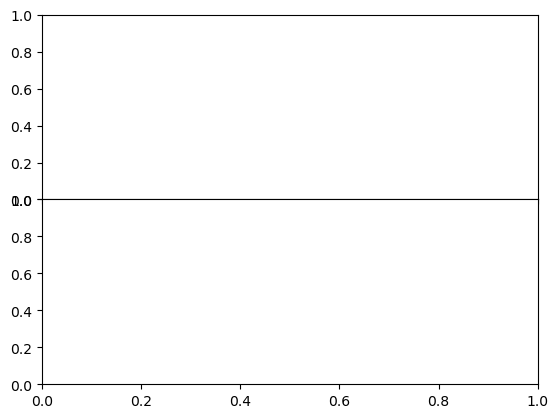

In [13]:
# break up the figure and axis definitions of a plot 
# so it is easier to assign values
fig, ax = plt.subplots(2, 1, sharex=True)
# create 2 subplots share x axis, in the next line we will remove 
# spaces between the horizontal axis, play with this value?
fig.subplots_adjust(hspace=0)

Annotate the position and marker for VO2 max

In [14]:
ax[0].annotate('$\dot VO_2max$ =({}) L/min'.format(round(ymax, 2)), 
               xy=(xmax, ymax), xytext=(xmax+.5, ymax+ 1),
               arrowprops=dict(facecolor='red', shrink= 0.05),
                )

Text(29.50016212, 4.718159437000001, '$\\dot VO_2max$ =(3.72) L/min')

#### For the first plot ax[0] we create the lable and make it red
Then we get rid of the right and top plot frame
We set the y axis lab as "L/min" and tell it to print a legend

In [15]:
ax[0].plot(x, y,  label=('$\dot VO_2$'), c='r' )
ax[0].spines[['right', 'top']].set_visible(False)
#note all these set features could be added in one line but reading it would be difficult
#ax.set(title = ('$\dot VO_2$'), label=('$\dot VO_2$ L/min'))  
ax[0].set(ylabel=('L/min'))
ax[0].legend()

Same thing for the second plot

In [16]:
# Second plot of values down from the top
ax[1].plot(x, y1, label=('VE'), c='b')
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].set(ylabel=('breaths/min'))
ax[1].legend()

#### We can now create a file with our first plot!

In [17]:
fig.savefig("VO2-3.png", dpi=300, bbox_inches = "tight")

#### As this is an interactive space we need to put all the code together for it to plot out interactively...

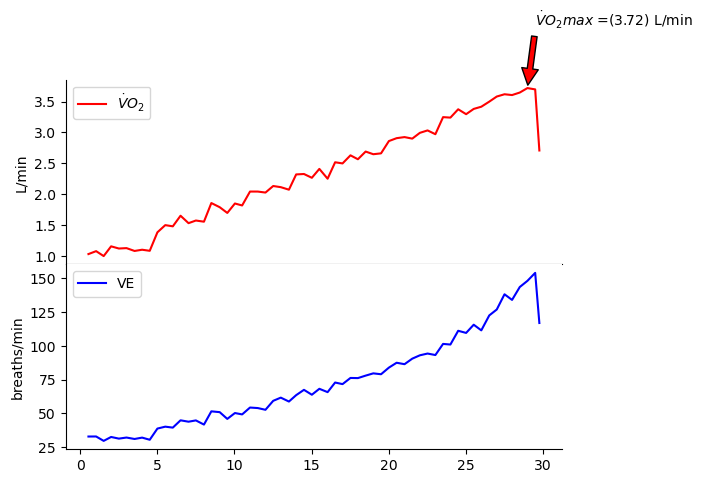

In [18]:
# break up the figure and axis definitions of a plot 
# so it is easier to assign values
fig, ax = plt.subplots(2, 1, sharex=True)
# create 2 subplots share x axis, in the next line we will remove 
# spaces between the horizontal axis, play with this value?
fig.subplots_adjust(hspace=0)
ax[0].annotate('$\dot VO_2max$ =({}) L/min'.format(round(ymax, 2)), 
               xy=(xmax, ymax), xytext=(xmax+.5, ymax+ 1),
               arrowprops=dict(facecolor='red', shrink= 0.05),
                )

ax[0].plot(x, y,  label=('$\dot VO_2$'), c='r' )
ax[0].spines[['right', 'top']].set_visible(False)
#note all these set features could be added in one line but reading it would be difficult
#ax.set(title = ('$\dot VO_2$'), label=('$\dot VO_2$ L/min'))  
ax[0].set(ylabel=('L/min'))
ax[0].legend()

# Second plot of values down from the top
ax[1].plot(x, y1, label=('VE'), c='b')
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].set(ylabel=('breaths/min'))
ax[1].legend()
fig.show()

In [19]:
df = pd.read_csv('../input/demo-knes381/subject_1523.csv', header=[0], skiprows=[1,2,3])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TIME      54 non-null     float64
 1   VO2       54 non-null     float64
 2   VO2/kg    54 non-null     float64
 3   METS      54 non-null     float64
 4   VCO2      54 non-null     float64
 5   VE        54 non-null     float64
 6   RER       54 non-null     float64
 7   RR        54 non-null     float64
 8   Vt        54 non-null     float64
 9   FEO2      54 non-null     float64
 10  FECO2     54 non-null     float64
 11  HR        54 non-null     float64
 12  VE/       54 non-null     float64
 13  VE/   .1  54 non-null     float64
 14  PetCO2    54 non-null     float64
 15  PO        54 non-null     int64  
dtypes: float64(15), int64(1)
memory usage: 6.9 KB


In [32]:
df = df.rename(columns={'VE/': 'VE/VO2','VE/.1': 'VE/VCO2'})

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TIME      54 non-null     float64
 1   VO2       54 non-null     float64
 2   VO2/kg    54 non-null     float64
 3   METS      54 non-null     float64
 4   VCO2      54 non-null     float64
 5   VE        54 non-null     float64
 6   RER       54 non-null     float64
 7   RR        54 non-null     float64
 8   Vt        54 non-null     float64
 9   FEO2      54 non-null     float64
 10  FECO2     54 non-null     float64
 11  HR        54 non-null     float64
 12  VE/       54 non-null     float64
 13  VE/   .1  54 non-null     float64
 14  PetCO2    54 non-null     float64
 15  PO        54 non-null     int64  
dtypes: float64(15), int64(1)
memory usage: 6.9 KB


In [34]:
import matplotlib.pyplot as plt

In [35]:
print(df.columns)

Index(['TIME', 'VO2   ', 'VO2/kg  ', 'METS ', 'VCO2  ', 'VE     ', 'RER  ',
       'RR  ', 'Vt    ', 'FEO2  ', 'FECO2 ', 'HR  ', 'VE/   ', 'VE/   .1',
       'PetCO2 ', 'PO'],
      dtype='object')


In [36]:
df.reset_index(drop=True)

,TIME,VO2,VO2/kg,METS,VCO2,VE,RER,RR,Vt,FEO2,FECO2,HR,VE/,VE/ .1,PetCO2,PO
0,0.514000,1.459290,16.582838,4.737954,1.112682,41.919689,0.762482,21.400778,1.958793,16.275774,3.774875,87.0,28.726089,37.674450,25.064108,50
1,1.022167,1.504223,17.093439,4.883840,1.160519,42.434860,0.771507,21.646441,1.960362,16.181290,3.888129,89.0,28.210491,36.565426,26.064850,50
2,1.519834,1.555103,17.671625,5.049036,1.147277,41.991577,0.737750,22.103148,1.899801,16.005651,3.884471,84.0,27.002441,36.601089,25.945581,50
3,2.012334,1.745615,19.836536,5.667582,1.338574,46.513016,0.766821,16.243654,2.863458,15.907585,4.089391,92.0,26.645630,34.748173,27.309790,50
4,2.532000,1.667379,18.947485,5.413567,1.274816,43.739609,0.764563,23.091724,1.894168,15.831031,4.141047,91.5,26.232559,34.310535,27.466810,50
5,3.035667,1.632267,18.548485,5.299567,1.244890,45.649750,0.762676,21.839842,2.090205,16.149261,3.877208,86.0,27.967091,36.669708,25.841257,125
6,3.502500,1.818190,20.661253,5.903215,1.374394,49.003513,0.755913,21.420919,2.287647,15.976556,3.986471,94.0,26.951805,35.654636,26.431112,125
7,4.033833,2.134393,24.254469,6.929848,1.626248,57.404961,0.761925,26.348808,2.178655,15.959549,4.026214,99.0,26.895214,35.299011,26.932281,125
8,4.529832,2.295791,26.088533,7.453866,1.817946,60.387909,0.791860,22.177420,2.722946,15.814274,4.275898,105.0,26.303749,33.217655,28.339865,125
9,5.019832,2.377771,27.020124,7.720036,1.955959,63.075264,0.822602,20.408165,3.090688,15.823215,4.403218,109.0,26.527058,32.247746,29.279306,125


In [37]:
df.columns = df.columns.str.strip().str.replace('"', '')

In [38]:
# simplify our terms to reduce future typing...
x = df['TIME']
y = df['VO2']
y1 = df['VE']

In [40]:
#Find VO2 max value 
ymax = max(y)
# find the x position of the ymax value
xmax = x[y.argmax()]

In [41]:
print(ymax)
print(xmax)

4.184775
26.500189


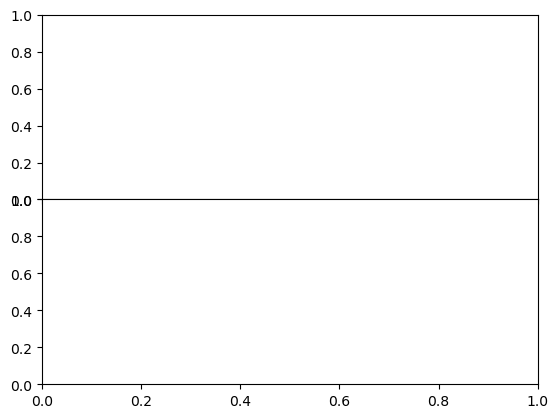

In [42]:
# break up the figure and axis definitions of a plot 
# so it is easier to assign values
fig, ax = plt.subplots(2, 1, sharex=True)
# create 2 subplots share x axis, in the next line we will remove 
# spaces between the horizontal axis, play with this value?
fig.subplots_adjust(hspace=0)

In [43]:
ax[0].annotate('$\dot VO_2max$ =({}) L/min'.format(round(ymax, 2)), 
               xy=(xmax, ymax), xytext=(xmax+.5, ymax+ 1),
               arrowprops=dict(facecolor='red', shrink= 0.05),
                )

Text(27.000189, 5.184775, '$\\dot VO_2max$ =(4.18) L/min')

In [44]:
# Second plot of values down from the top
ax[1].plot(x, y1, label=('VE'), c='b')
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].set(ylabel=('breaths/min'))
ax[1].legend()

In [47]:
fig.savefig("VO2-3.png", dpi=300, bbox_inches = "tight")

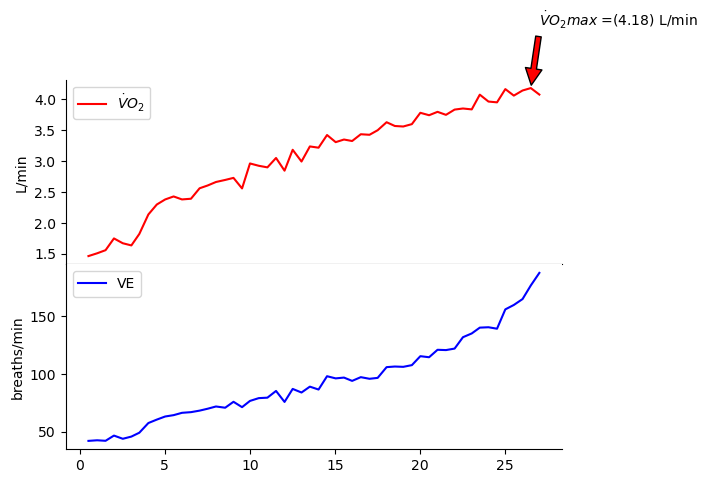

In [48]:
# break up the figure and axis definitions of a plot 
# so it is easier to assign values
fig, ax = plt.subplots(2, 1, sharex=True)
# create 2 subplots share x axis, in the next line we will remove 
# spaces between the horizontal axis, play with this value?
fig.subplots_adjust(hspace=0)
ax[0].annotate('$\dot VO_2max$ =({}) L/min'.format(round(ymax, 2)), 
               xy=(xmax, ymax), xytext=(xmax+.5, ymax+ 1),
               arrowprops=dict(facecolor='red', shrink= 0.05),
                )

ax[0].plot(x, y,  label=('$\dot VO_2$'), c='r' )
ax[0].spines[['right', 'top']].set_visible(False)
#note all these set features could be added in one line but reading it would be difficult
#ax.set(title = ('$\dot VO_2$'), label=('$\dot VO_2$ L/min'))  
ax[0].set(ylabel=('L/min'))
ax[0].legend()

# Second plot of values down from the top
ax[1].plot(x, y1, label=('VE'), c='b')
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].set(ylabel=('breaths/min'))
ax[1].legend()
fig.show()